# WT -  Exploratory Data Analysis on Aviation Dataset


## Rahul Manjhi

##







## 1. Data Loading and Initial Exploration:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [84]:
# Load the datasets
aviation_data = pd.read_csv("AviationData.csv")
state_code_data = pd.read_csv('USState_Code.csv')

C:\Users\manjh\AppData\Local\Temp\ipykernel_4964\580962526.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv("AviationData.csv")


In [96]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [19]:
# Display the first few rows of each dataset to understand their structure
aviation_head = aviation_data.head()
state_code_head = state_code_data.head()

In [21]:
# Generate a summary of the aviation dataset using .info() and .describe() methods
aviation_info = aviation_data.info()
aviation_description = aviation_data.describe(include='all')

aviation_head, state_code_head, aviation_info, aviation_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

(         Event.Id Investigation.Type Accident.Number  Event.Date  \
 0  20001218X45444           Accident      SEA87LA080  1948-10-24   
 1  20001218X45447           Accident      LAX94LA336  1962-07-19   
 2  20061025X01555           Accident      NYC07LA005  1974-08-30   
 3  20001218X45448           Accident      LAX96LA321  1977-06-19   
 4  20041105X01764           Accident      CHI79FA064  1979-08-02   
 
           Location        Country   Latitude  Longitude Airport.Code  \
 0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
 1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
 2    Saltville, VA  United States  36.922223 -81.878056          NaN   
 3       EUREKA, CA  United States        NaN        NaN          NaN   
 4       Canton, OH  United States        NaN        NaN          NaN   
 
   Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
 0          NaN  ...          Personal         NaN                  2

# 2. Data Cleaning:


In [23]:
# Identifying columns with missing values and calculating the percentage of missing values
missing_values = aviation_data.isnull().sum()
missing_percentage = (missing_values / len(aviation_data)) * 100

In [25]:
# Separating numeric and categorical columns
numeric_columns = aviation_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = aviation_data.select_dtypes(include=['object']).columns

In [27]:
# Displaying the missing values and their percentages for both numeric and categorical columns
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [29]:
# Displaying the summary of missing data
missing_data_summary.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38757,43.601570
Airport.Name,36185,40.708074
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


# 3. Data Preprocessing:


In [37]:
# Function to identify outliers using IQR
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [39]:
# Columns to analyze for outliers
columns_to_analyze = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

In [41]:
# Identifying outliers for each column
outliers_summary = {col: identify_outliers_iqr(aviation_data, col).shape[0] for col in columns_to_analyze}

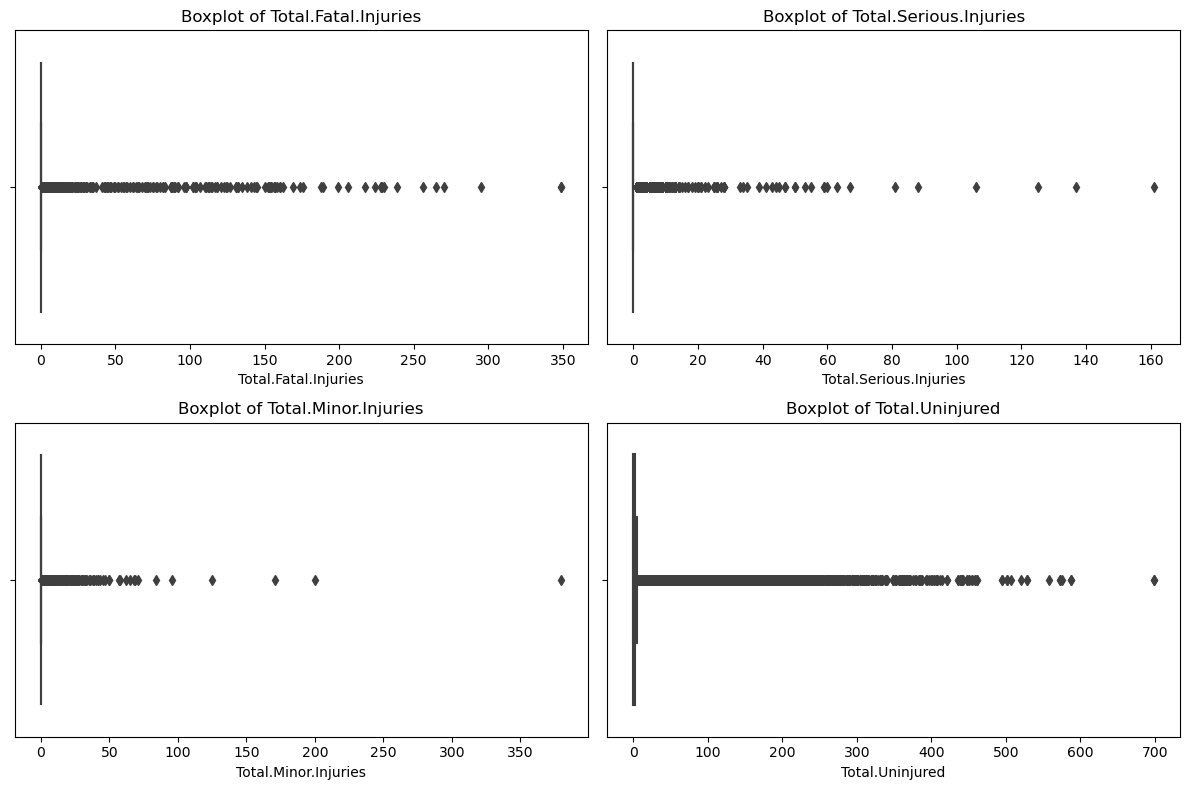

In [43]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=aviation_data[column].dropna())
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [45]:
outliers_summary

{'Total.Fatal.Injuries': 17813,
 'Total.Serious.Injuries': 13090,
 'Total.Minor.Injuries': 15502,
 'Total.Uninjured': 4147}

# 4. Exploratory Data Analysis (EDA) and Visualization:

## Questions to Explore and Visualize:


# Q1. Weather Conditions:

In [58]:
# Clean the 'Weather.Condition' column by removing any leading/trailing whitespace and dropping NaNs
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].str.strip()

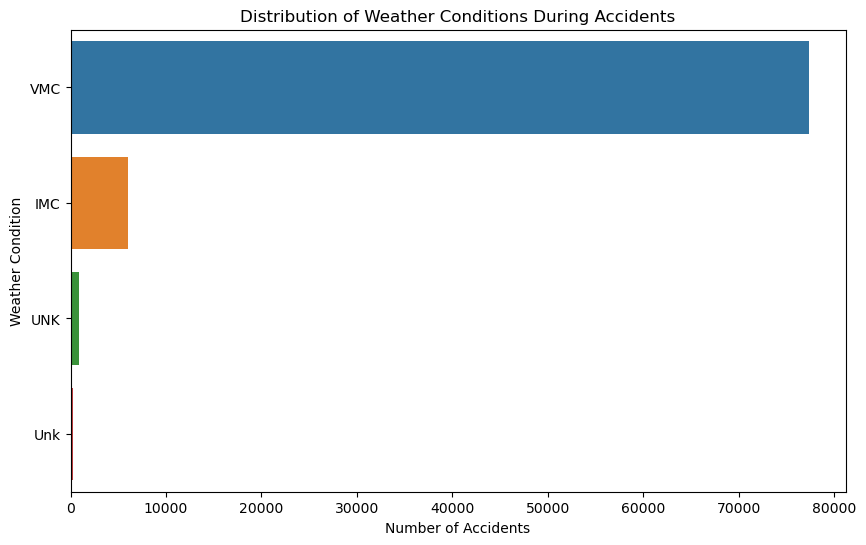

In [60]:
# Visualize the distribution of weather conditions during accidents using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather.Condition', data=aviation_data, order=aviation_data['Weather.Condition'].value_counts().index)
plt.title('Distribution of Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()


# Q2. Correlation between Weather and Severity:

In [64]:
# Convert categorical 'Weather.Condition' to numerical values if needed
weather_map = {'VMC': 1, 'IMC': 2, 'Fog': 3, 'Rain': 4, 'Snow': 5}  # Example mapping
aviation_data['Weather.Numeric'] = aviation_data['Weather.Condition'].map(weather_map)



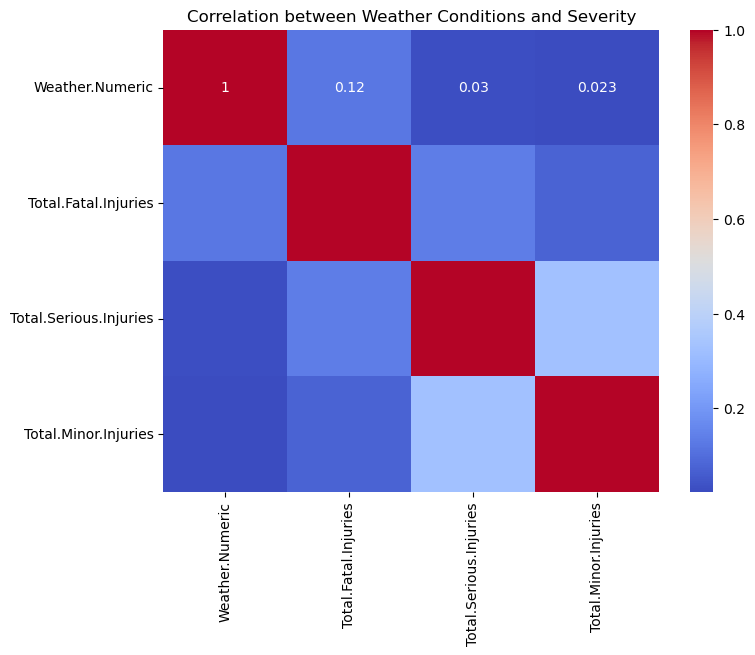

In [72]:
# Remove the 'Aircraft.damage' column from the correlation calculation
correlation_matrix = aviation_data[['Weather.Numeric', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Weather Conditions and Severity')
plt.show()

# Q3. Airport Analysis:

In [78]:
# Clean the 'Airport.Name' column
aviation_data['Airport.Name'] = aviation_data['Airport.Name'].str.strip()

# Group by 'Airport.Name' and count the number of accidents
airport_accidents = aviation_data['Airport.Name'].value_counts().head(10)  # Top 10 airports

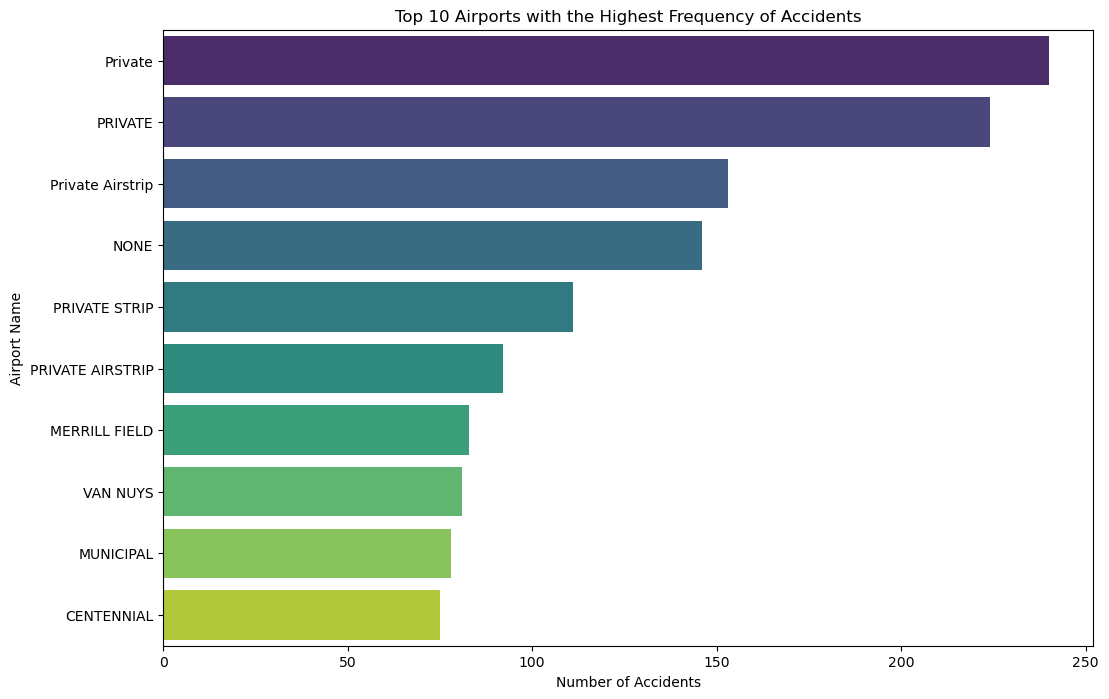

In [80]:
# Visualize the frequency of accidents by airport using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=airport_accidents.values, y=airport_accidents.index, palette='viridis')
plt.title('Top 10 Airports with the Highest Frequency of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Airport Name')
plt.show()

# Q4. Aircraft Models:

In [106]:
# Clean the 'Aircraft.Model' column
aviation_data['Model'] = aviation_data['Model'].str.strip()

# Group by 'Aircraft.Model' and count the number of accidents
aircraft_accidents = aviation_data['Model'].value_counts().head(10)  # Top 10 aircraft models


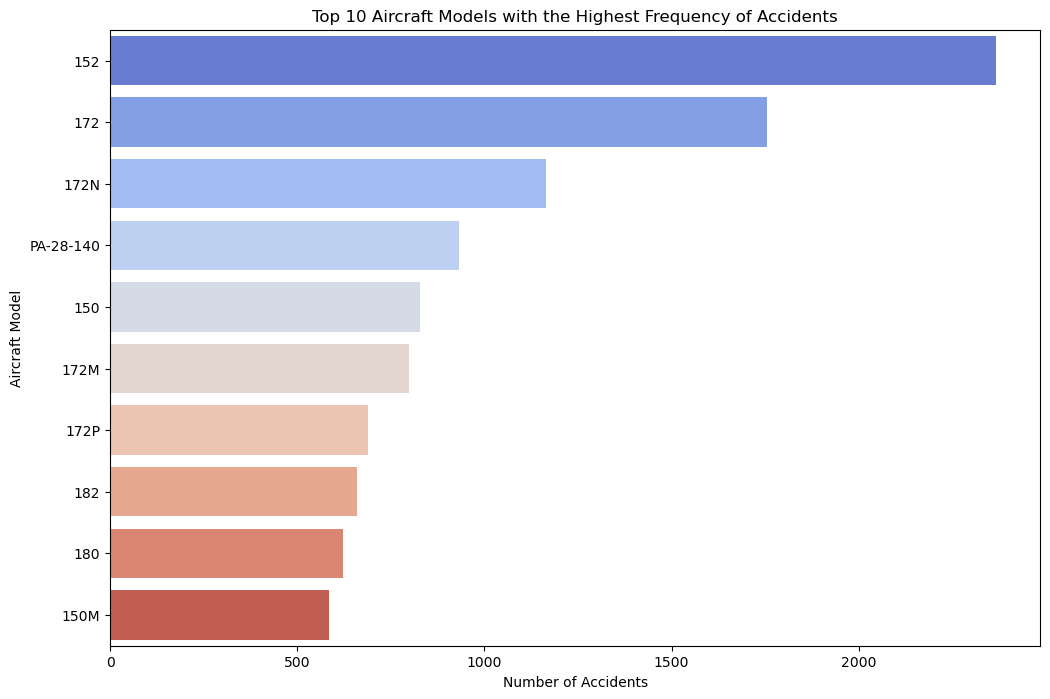

In [108]:

# Visualize the frequency of accidents by aircraft model using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=aircraft_accidents.values, y=aircraft_accidents.index, palette='coolwarm')
plt.title('Top 10 Aircraft Models with the Highest Frequency of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.show()


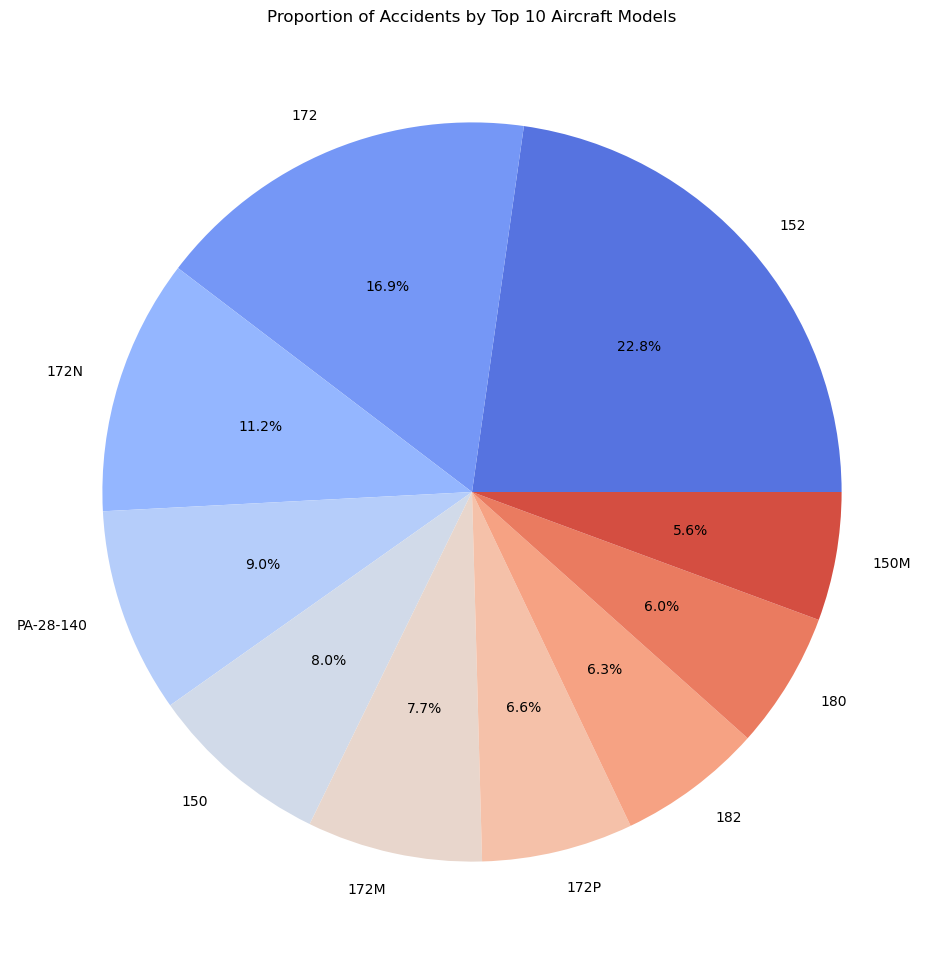

In [112]:
# Optionally, create a pie chart to visualize the proportion of accidents by aircraft model
plt.figure(figsize=(12, 12))
aircraft_accidents.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=10))
plt.title('Proportion of Accidents by Top 10 Aircraft Models')
plt.ylabel('')  # Remove y-label for better visualization
plt.show()

# Q5. Engine Type Analysis:

In [130]:


# Clean the 'Engine.Type' column
aviation_data['Engine.Type'] = aviation_data['Engine.Type'].str.strip()

# Group by 'Engine.Type' and count the number of accidents
engine_accidents = aviation_data['Engine.Type'].value_counts()

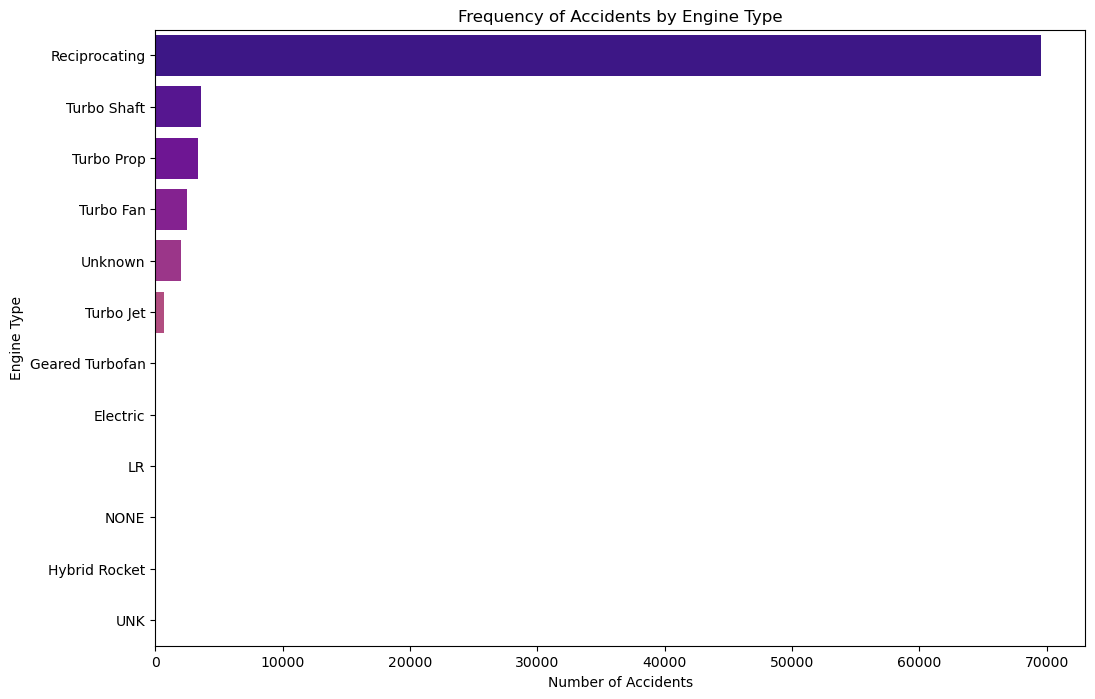

In [126]:
# Visualize the frequency of accidents by engine type using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=engine_accidents.values, y=engine_accidents.index, palette='plasma')
plt.title('Frequency of Accidents by Engine Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')
plt.show()

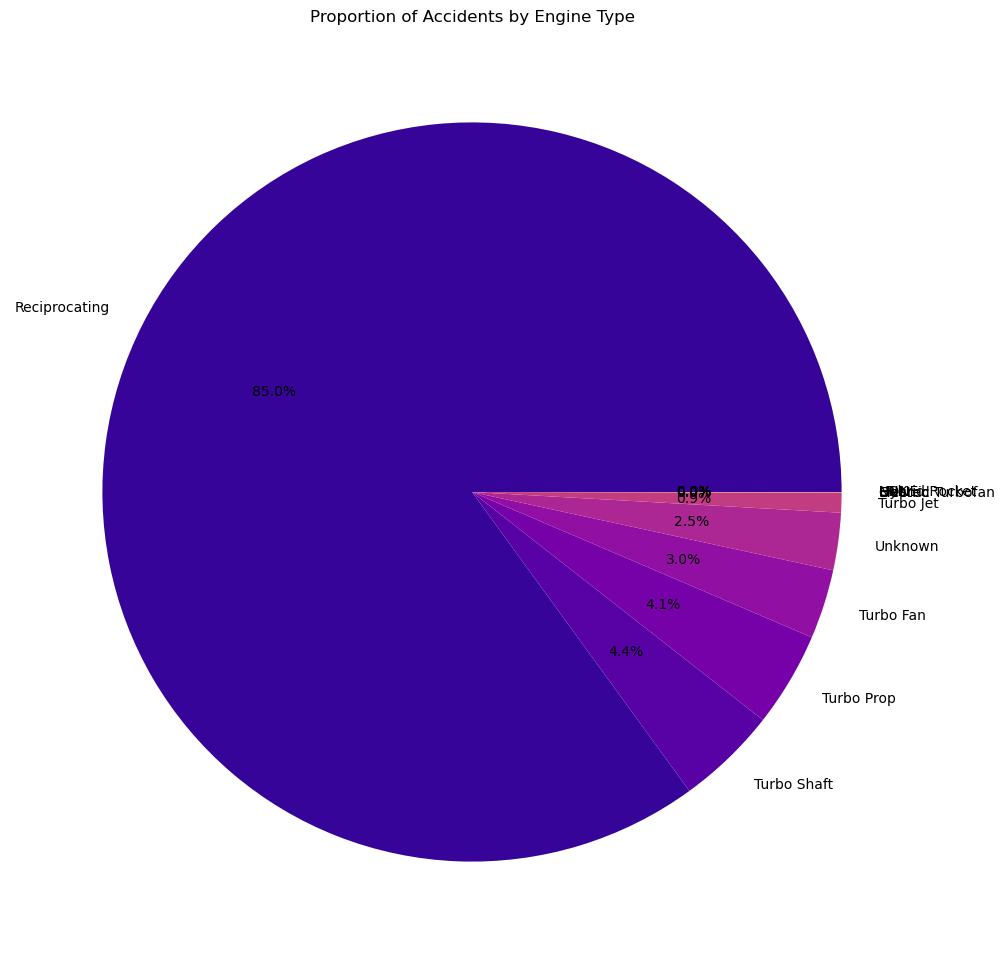

In [133]:
# Optionally, create a pie chart
plt.figure(figsize=(12, 12))
plt.pie(engine_accidents, labels=engine_accidents.index, autopct='%1.1f%%', colors=sns.color_palette('plasma', len(engine_accidents)))
plt.title('Proportion of Accidents by Engine Type')
plt.show()


# Q6. Phase of Flight:

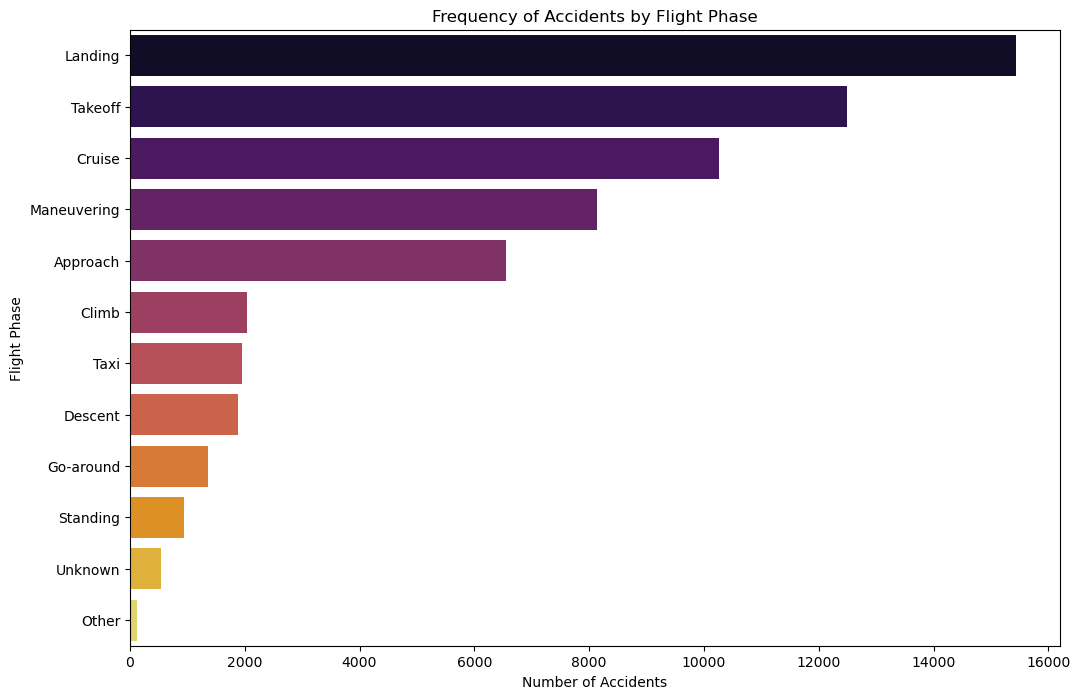

In [150]:

# Clean the 'Broad.phase.of.flight' column
aviation_data['Broad.phase.of.flight'] = aviation_data['Broad.phase.of.flight'].str.strip()

# Group by 'Broad.phase.of.flight' and count the number of accidents
phase_accidents = aviation_data['Broad.phase.of.flight'].value_counts()

# Visualize the frequency of accidents by flight phase using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=phase_accidents.values, y=phase_accidents.index, palette='inferno')
plt.title('Frequency of Accidents by Flight Phase')
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.show()


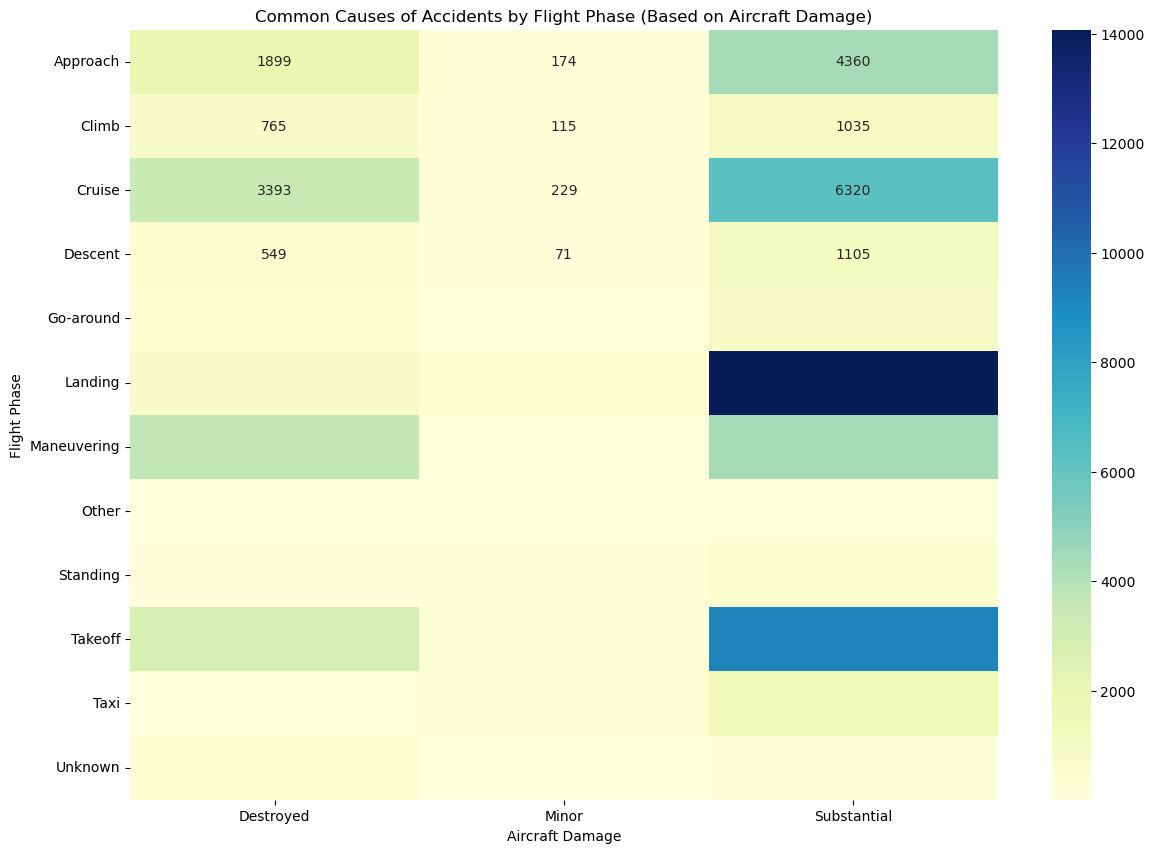

In [161]:
# Group by 'Broad.phase.of.flight' and 'Aircraft.damage'
common_causes = aviation_data.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().unstack().fillna(0)

# Visualize common causes within the top flight phases (Optional)
plt.figure(figsize=(14, 10))
sns.heatmap(common_causes, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Common Causes of Accidents by Flight Phase (Based on Aircraft Damage)')
plt.xlabel('Aircraft Damage')
plt.ylabel('Flight Phase')
plt.show()

In [155]:
# List all column names to identify the correct one
aviation_data.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Q7. Impact of Flight Phase on Severity:

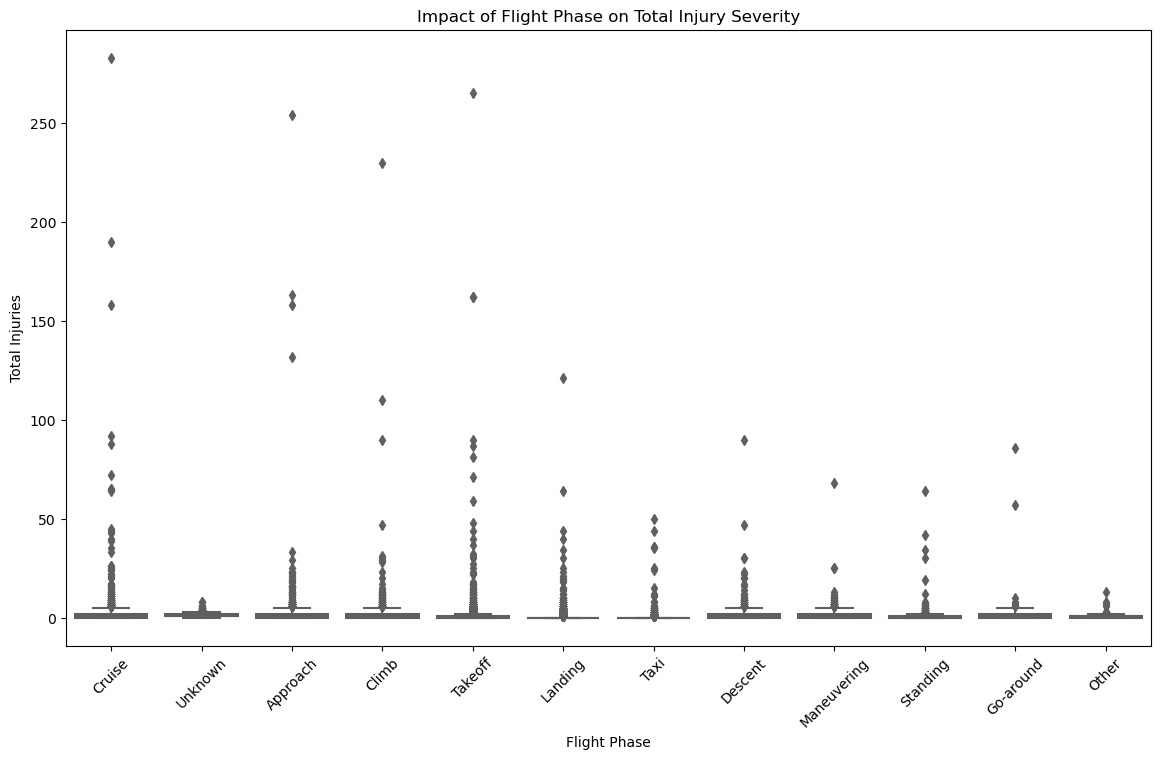

In [170]:
# Create a new column for total injuries (optional)
aviation_data['Total.Injuries'] = aviation_data['Total.Fatal.Injuries'].fillna(0) + aviation_data['Total.Serious.Injuries'].fillna(0) + aviation_data['Total.Minor.Injuries'].fillna(0)

# Plot injury severity by flight phase using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Broad.phase.of.flight', y='Total.Injuries', data=aviation_data, palette='Set3')
plt.title('Impact of Flight Phase on Total Injury Severity')
plt.xlabel('Flight Phase')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

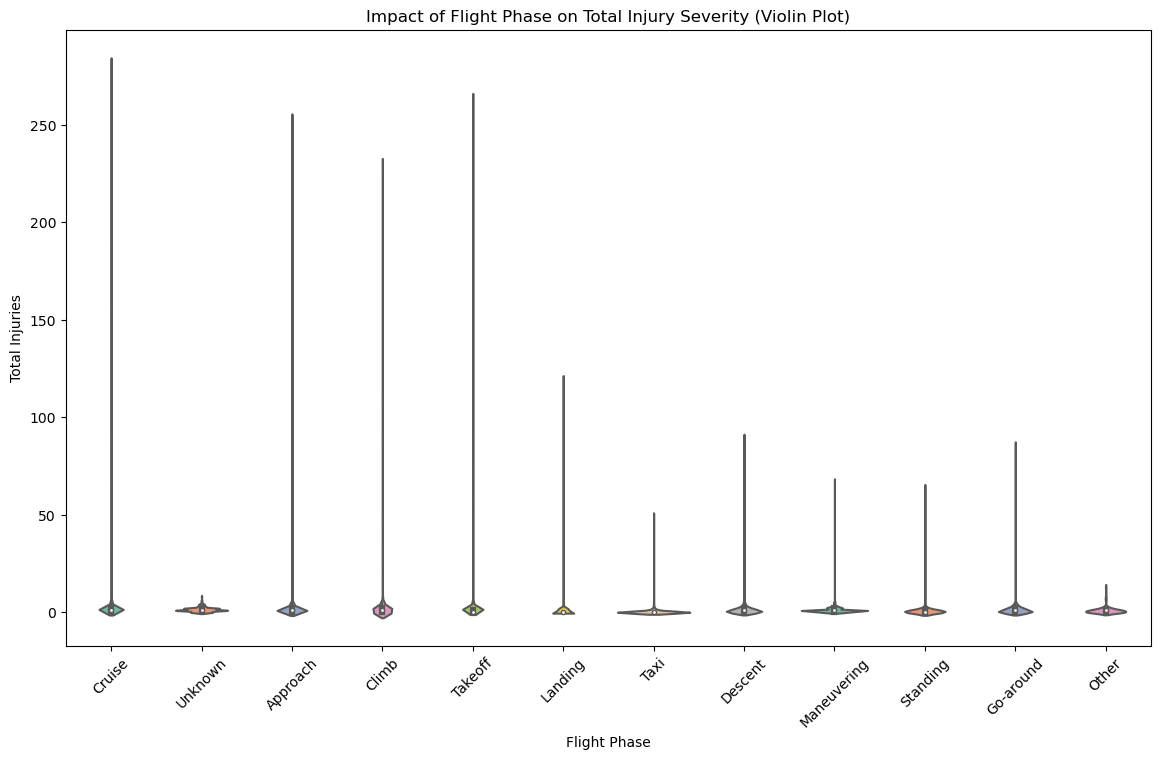

In [173]:
# Plot aircraft damage by flight phase using a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Broad.phase.of.flight', y='Total.Injuries', data=aviation_data, palette='Set2')
plt.title('Impact of Flight Phase on Total Injury Severity (Violin Plot)')
plt.xlabel('Flight Phase')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

# Q8. Factors Associated with Fatality Rates:

In [193]:
# Group by 'Make' and calculate the mean fatality rate
make_fatality_rate = fatalities_data.groupby('Make')['Total.Fatal.Injuries'].mean().sort_values(ascending=False)

# Convert to DataFrame for heatmap plotting
make_fatality_rate_df = make_fatality_rate.reset_index()

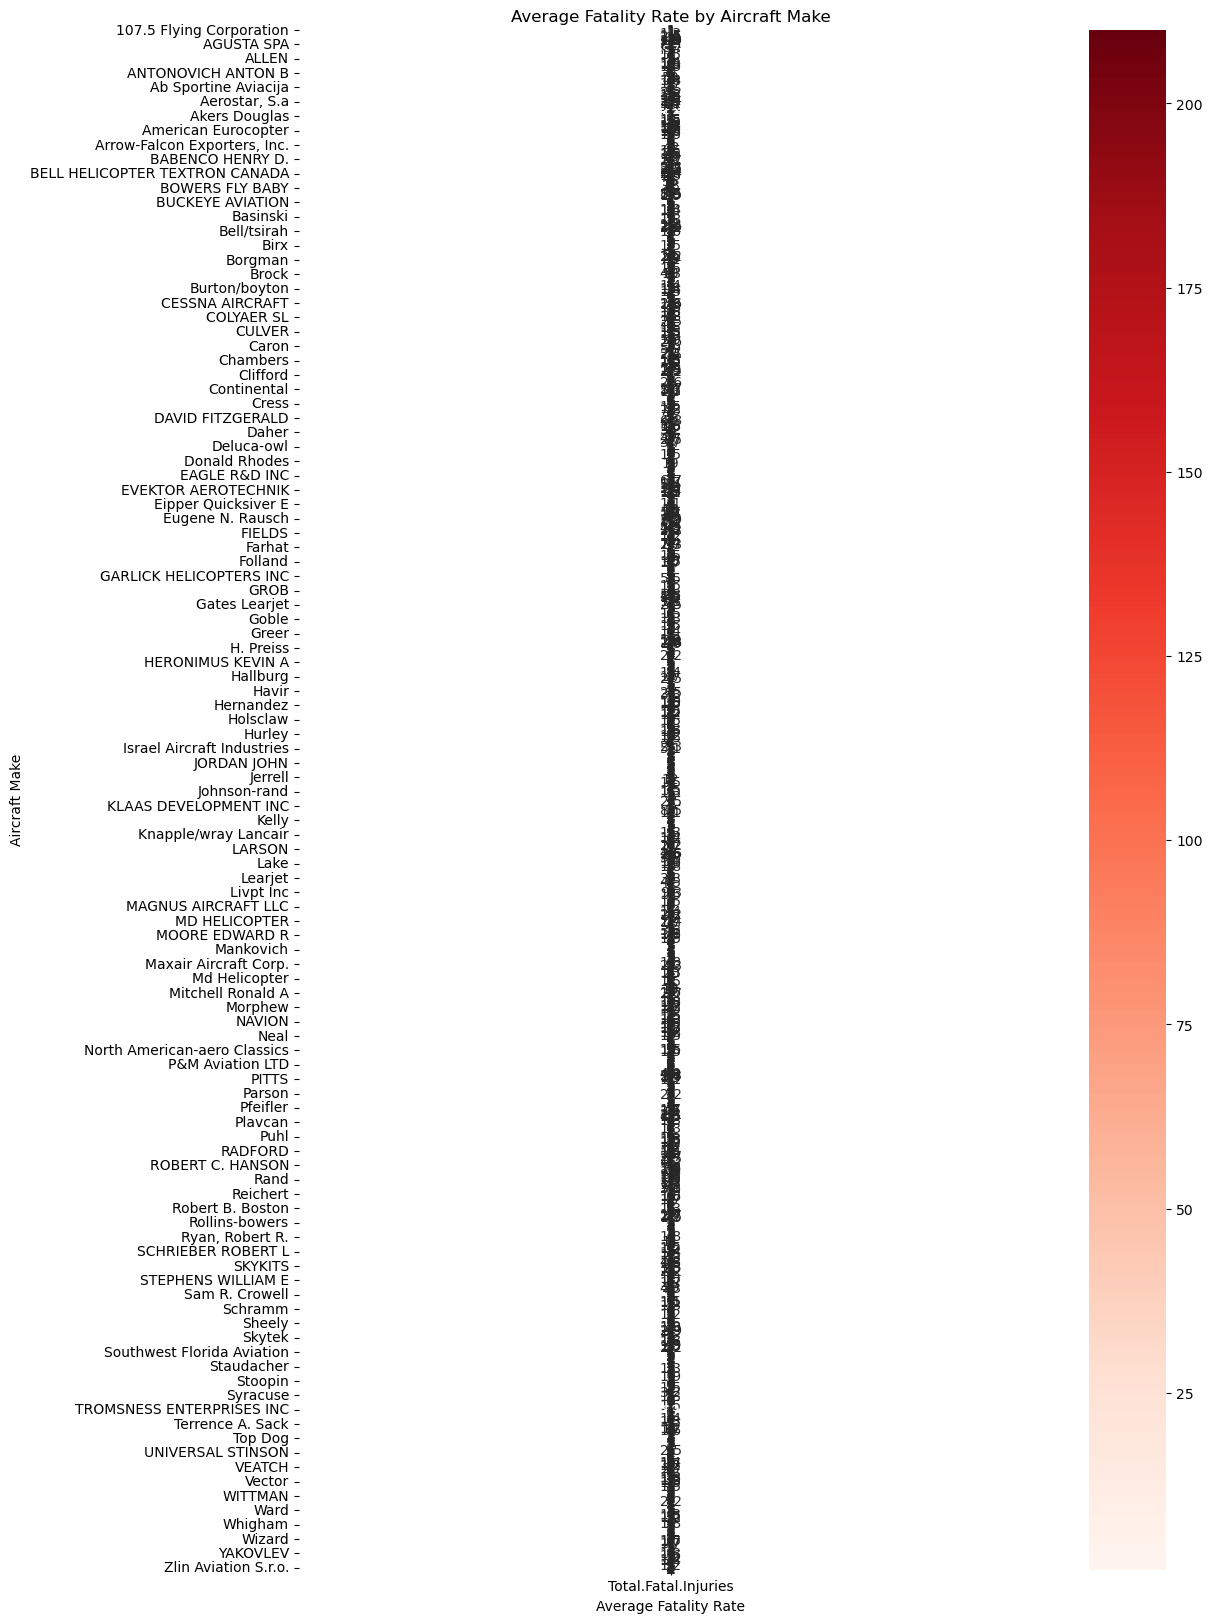

In [195]:
# Heatmap: Aircraft Make vs. Average Fatality Rate
plt.figure(figsize=(12, 20))
sns.heatmap(make_fatality_rate_df.pivot_table(index='Make', values='Total.Fatal.Injuries'), annot=True, cmap='Reds', linewidths=0.5)
plt.title('Average Fatality Rate by Aircraft Make')
plt.xlabel('Average Fatality Rate')
plt.ylabel('Aircraft Make')
plt.show()


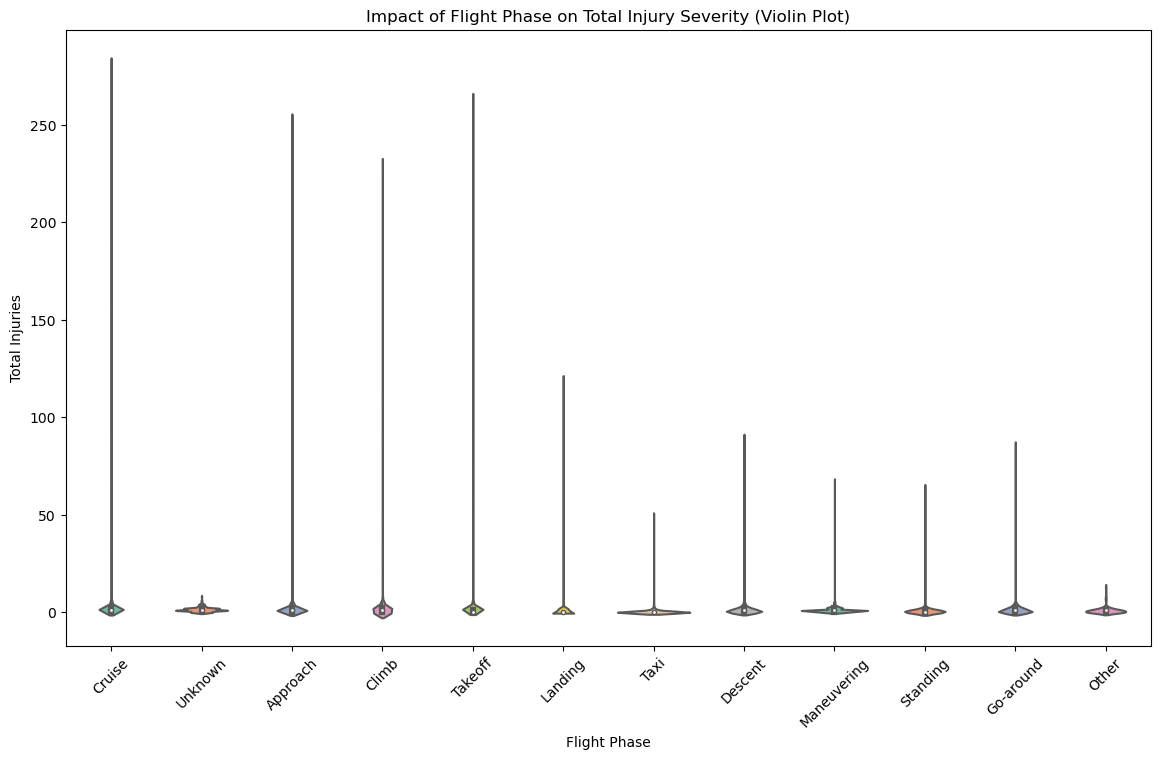

# Q9. Engine Count and Survival Likelihood:

In [209]:
# Fill missing injury data with 0 for calculation purposes
aviation_data['Total.Fatal.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Serious.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Minor.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Uninjured'].fillna(0, inplace=True)

# Calculate Survival Rate
aviation_data['Survival.Rate'] = aviation_data['Total.Uninjured'] / (
    aviation_data['Total.Fatal.Injuries'] + 
    aviation_data['Total.Serious.Injuries'] + 
    aviation_data['Total.Minor.Injuries'] + 
    aviation_data['Total.Uninjured'])

# Replace NaN values with 0 (if no one was on board or data is missing)
aviation_data['Survival.Rate'].fillna(0, inplace=True)

In [ ]:
# Scatter plot: Number of Engines vs. Survival Rate
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Number.of.Engines', y='Survival.Rate', data=aviation_data, hue='Make', palette='viridis', alpha=0.7)
plt.title('Number of Engines vs. Survival Rate')
plt.xlabel('Number of Engines')
plt.ylabel('Survival Rate')
plt.show()


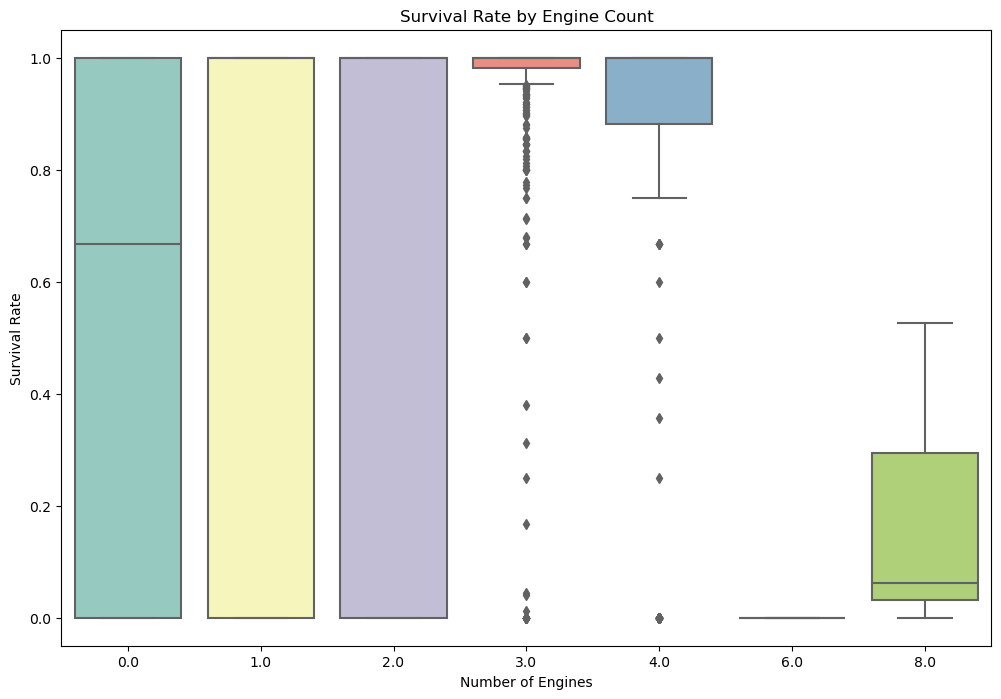

In [212]:
# Boxplot: Number of Engines vs. Survival Rate
plt.figure(figsize=(12, 8))
sns.boxplot(x='Number.of.Engines', y='Survival.Rate', data=aviation_data, palette='Set3')
plt.title('Survival Rate by Engine Count')
plt.xlabel('Number of Engines')
plt.ylabel('Survival Rate')
plt.show()


# Q10. Injury Analysis Across Locations:

In [215]:
# Fill missing injury data with 0 for calculation purposes
aviation_data['Total.Fatal.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Serious.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Minor.Injuries'].fillna(0, inplace=True)

# Calculate the total number of injuries
aviation_data['Total.Injuries'] = (
    aviation_data['Total.Fatal.Injuries'] + 
    aviation_data['Total.Serious.Injuries'] + 
    aviation_data['Total.Minor.Injuries'])

# Group by country and sum injuries
injuries_by_country = aviation_data.groupby('Country')['Total.Injuries'].sum().reset_index()
injuries_by_country = injuries_by_country.sort_values(by='Total.Injuries', ascending=False)

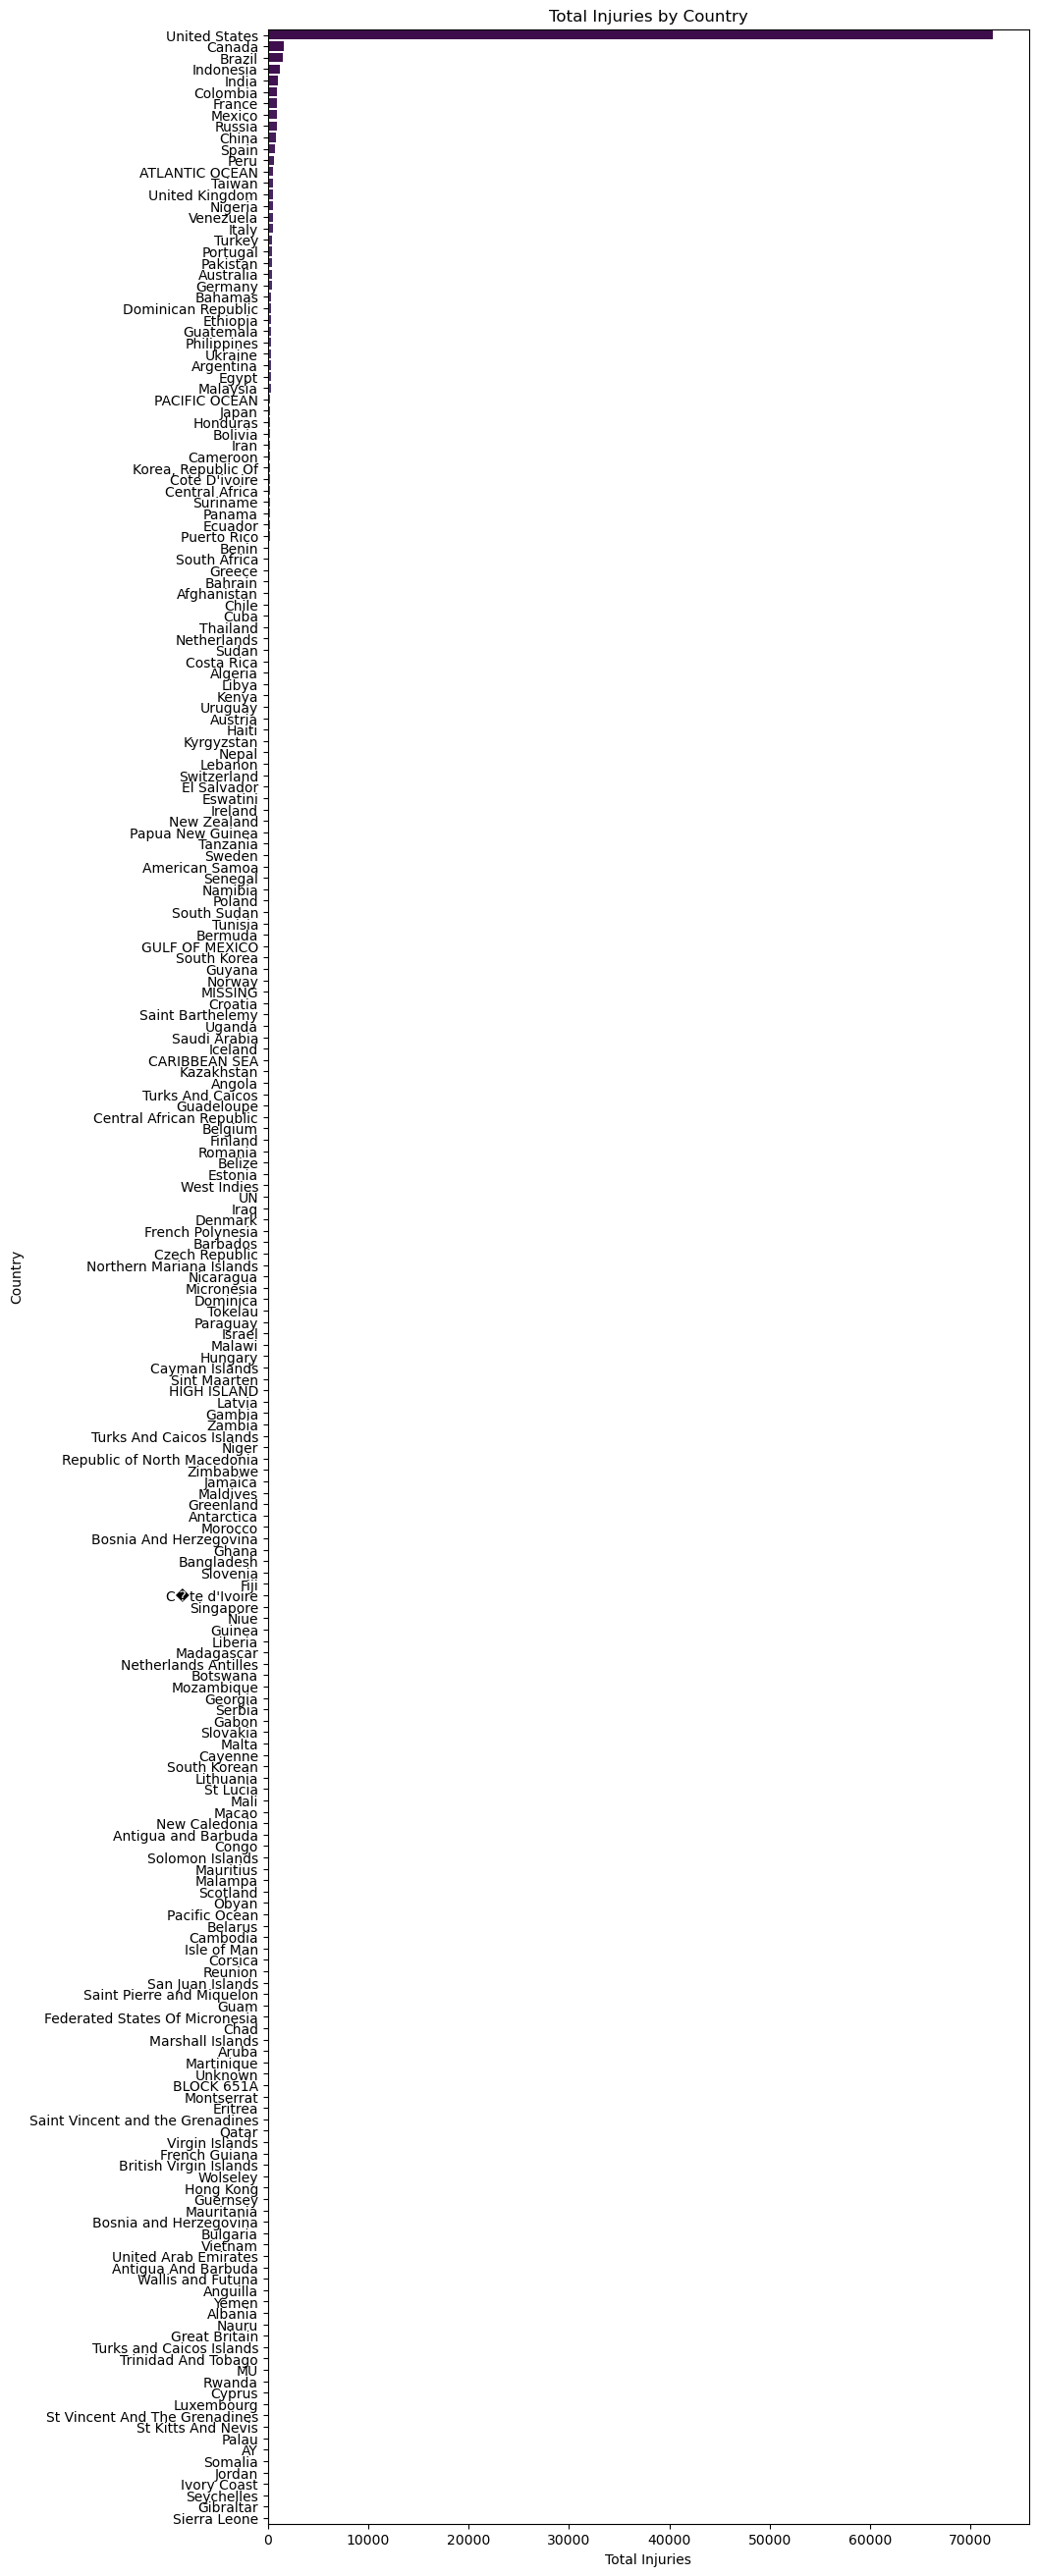

In [228]:
# Plot total injuries by country using a bar plot
plt.figure(figsize=(10, 33))
sns.barplot(x='Total.Injuries', y='Country', data=injuries_by_country, palette='viridis')
plt.title('Total Injuries by Country')
plt.xlabel('Total Injuries')
plt.ylabel('Country')
plt.show()


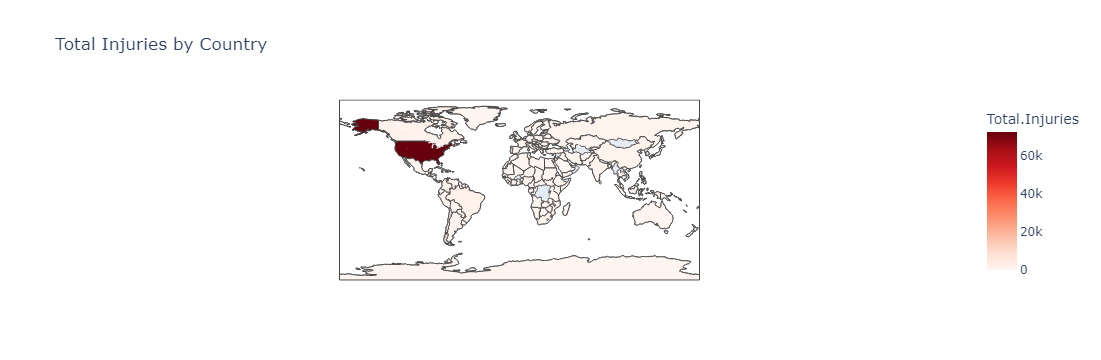

In [217]:
import plotly.express as px

# Create a choropleth map for total injuries by country
fig = px.choropleth(injuries_by_country, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Total.Injuries',
                    color_continuous_scale='Reds', 
                    title='Total Injuries by Country')
fig.show()
